In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run cell',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.restart_run_all();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [1]:
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


In [2]:
from qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers import Continuous_AcquisitionController

continuous_controller = Continuous_AcquisitionController(name='continuous_controller', 
                                                         alazar_name='ATS',
                                                         server_name='Alazar_server')

In [ ]:
ATS.get_parameter('GET_ASYNC_BUFFERS_PENDING_EMPTY')

In [21]:
ATS.get_parameter('EXT_TRIGGER_ATTENUATOR_RELAY')

array([1])

In [16]:
import ctypes

In [20]:
ATS.set_parameter('EXT_TRIGGER_COUPLING', value=ctypes.c_ulong(2))
ATS.set_parameter('EXT_TRIGGER_ATTENUATOR_RELAY', value=ctypes.c_ulong(0))

In [5]:
layout.stop()

ELR_parameter.setup(samples=3)
ATS_controller.update_acquisition_settings(buffer_timeout=2000)
try:
    ELR_parameter()
    print('Success!')
except RuntimeError as e:
    if 'error 579' in e.args[0]:
        print('Did not receive trigger')
    else:
        print('Error:\n\n{}'.format(e))

Success!


C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [ ]:
ATS.get_status()

In [ ]:
ATS.records_per_buffer()

In [ ]:
ATS.triggered()

In [13]:
arbstudio.run([3])
pulseblaster.start()

0

In [ ]:
arbstudio.stop()
pulseblaster.stop()

Wall time: 6.56 s


<IPython.core.display.Javascript object>


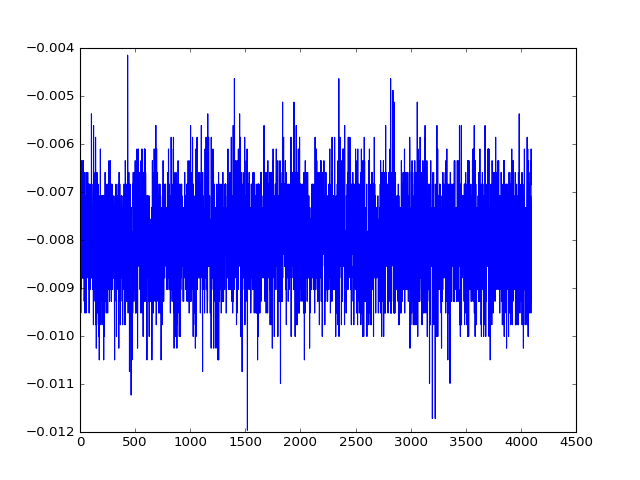

In [4]:
ATS.config(sample_rate=200000, )
continuous_controller.average_mode('none')
continuous_controller.samples_per_trace(1024*4)
continuous_controller.traces_per_acquisition(5)
continuous_controller.update_acquisition_settings(mode='CS',
                                                  samples_per_record=32,
                                                  buffer_timeout=5000,
                                                  allocated_buffers=10,
                                                  channel_selection='C')
continuous_controller.setup()

%time result = continuous_controller.acquisition()

trace_idx = 0
for ch in range(len(result)):
    plt.plot(result[ch][trace_idx])